In [1]:
x, y, t = var('x,y,t')

f(x,y) = y
g(x,y) = x-x^3

xt = f(x,y)
yt = g(x,y)

vf = vector([xt,yt])
vf

(y, -x^3 + x)

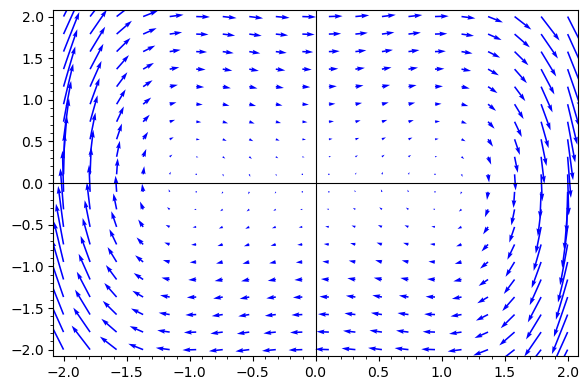

In [2]:
g = Graphics()

vector_field = plot_vector_field(vf, (x,-2,2), (y,-2,2), color='blue')
g += vector_field
g.show()

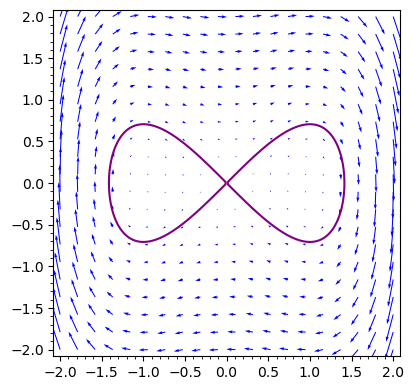

In [3]:
separatrix = y^2==x^2- x^4/2
g += implicit_plot(separatrix, (x,-2,2), (y,-2,2), color = "purple")
g.show()

In [4]:
import numpy as np

initial_conditions = [(N(i), N(j)) for i in np.linspace(-2,2,11) for j in np.linspace(-2,2,11)]

for ic in initial_conditions:
    try:
        sol = desolve_system_rk4(vf, [x, y], ics=[0, ic[0], ic[1]], ivar=t, end_points=10, step=0.1)
        Q = [[j,k]  for i,j,k in sol]
        g+=list_plot(Q, plotjoined=True, color="pink",  alpha=0.1 )+point2d(ic, color='green', pointsize=10)
    except Exception as e:
        print(e)


In [5]:
crit_points = solve([xt==0, yt==0], x, y)
crit_points

[[x == 0, y == 0], [x == 1, y == 0], [x == -1, y == 0]]

[x == 0, y == 0]
unable to simplify to complex approximation
[x == 1, y == 0]
unable to simplify to complex approximation
[x == -1, y == 0]
unable to simplify to complex approximation


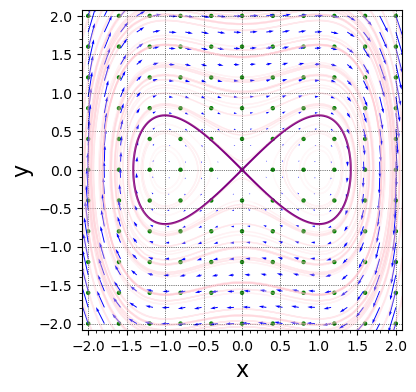

In [6]:
for point in crit_points:
    try:
        g += point2d(point, color='red', pointsize=30)
    except Exception as e:
        print(point)
        print(e)

# Show the plot
g.show(gridlines=True, axes_labels=['x', 'y'], xmin=-2, xmax=2, ymin=-2, ymax=2)